# Regression Analysis

## About the dataset

This dataset was collected to investigate the relationship between systolic blood pressure (Response) and personal characteristics, school types, location, mode of transport to school, BMI and overweight in secondary school children in Fako division, South West Region, Cameroon.

# Purpose and Objective 

The purpose of this project is to demonstrate knowledge of exploratory data analysis (EDA) [discovery, structuring, cleaning, joining, validating and presenting] on our dataset as a best practice to give us insights and make data fit for further analysis and modelling. Later on, we wil proceed to build our machine learning models using the cleaned and validated data obtained by performing EDA

The main objective in this project is to: 
i) Build a multiple linear regression model to investigate possible predictors of systolic BP and 
ii) Build a simple logistic regression model using overweight as outcome to identify risk factors of overweight. 

# Tools used for analysis, visualizations and model building

In this project, we will use python libraries for analysis (pandas and numpy), visualization (matplotlib) and model building.

# Project parts

This project will be broken down into 3 parts:

# Part 1: Exploratory Data Analysis (EDA)

In this part of the project, we will use the required libraries to get to know our data, find insights, check and handle missing data, as well as visualize our data to spot and identify the characteristics that lie within our data.

# Part 2: Model building 

in this part, we will use the insights generated from the process of the EDA to build our machine learning algorithm.

# Part 3: Presentation of results

what insights did we generate from our model? what is the impact of this finding to whom it may concern.

# Exploratory Data Analysis

# Importing libraries

In [1]:
# import libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a Dataframe
The dataset provided is in the form of an excel file named practical data stored in my local machine. We will load the data from the excel file into a Dataframe and save it in a variable

In [2]:
# Load data from an excel file into a Dataframe and save in a variable
# i will load the data to a variable called students since the data is about school children


students = pd.read_excel(r'C:\Users\THE EYE INFORMATIQUE\Desktop\PRACTICAL  DATA.xlsx')

# Data exploration
We will explore the dataset and answer questions to guide our exploration and analysis of the data as well as accurately model our algorithms.

To begin, let's display the first few rows of our data to get an understanding of how the dataset is structured

In [3]:
# Display the first 10 rows of the data
# we will use .head() method, which by default displays the first 5 rows


students.head(10)

,SN,Location,School types,Class,Age,Sex,Household size,Education level,Overweight in family,Mean to go to school,Weight(kg),Height(cm),Abdominal sie,Systolic BP,BMI,Overweight
0,6,Semi urban,Day school,3,13,Female,1,Secondary,No,On foot,43.0,157,75.0,118.0,17.4,No
1,7,Semi urban,Day school,3,14,Female,2,University,No,On foot,46.0,159,76.0,111.0,18.2,No
2,22,Semi urban,Day school,1,10,Female,2,University,No,On foot,33.0,132,63.0,94.0,19.2,YES
3,24,Semi urban,Day school,4,19,Female,2,Primary,No,On foot,65.0,168,80.0,126.0,23.1,No
4,32,Semi urban,Day school,3,12,Female,2,University,No,On foot,31.0,151,70.0,87.0,13.8,No
5,38,Semi urban,Day school,3,12,Female,2,Secondary,No,On foot,46.0,155,68.0,123.0,19.3,No
6,43,Semi urban,Day school,3,13,Female,3,University,No,On foot,50.0,156,73.0,94.0,20.4,No
7,50,Semi urban,Day school,1,11,Female,2,University,No,On foot,42.0,151,65.0,99.0,18.3,No
8,63,Rural,Bording,5,17,Female,3,University,No,On foot,45.0,162,68.0,128.0,17.1,No
9,64,Rural,Bording,2,12,Female,2,Secondary,No,By bike,41.0,146,70.0,108.0,19.3,No


Let's calculate the number of rows and columns in the dataset

In [ ]:
# To get the number of rows and columns in our data, we use the shape property

students.shape

# Question: 
What do you notice about the shape of the dataset?

- The shape of the dataset is (1229, 16). Jhe first number, 1229, represents the number of rows (entries). The second number, 16, represents the number of columns. According to this dataset, 1229 school students were interviewed and evaluate and this dataset shows 16 aspects of each student.

Let's find out the characteristics or aspects (columns) of our dataset, and eliminate the ones we might not need. 

In [ ]:
# Display all the columns in the data set.

students.columns

# Let's do some clean-up
Some of these columns are not very relevant to us and hence we will drop them all (SN, Class, Household size, Overweight in family, Abdominal sie)

In [4]:
# Drop columns [SN, Class, Household size, Overweight in family, Abdominal sie]
# we set the axis to 1, this is to indicate we wish to delete the columns
# we will asign the results back to students variable


students = students.drop(['SN', 'Class ', 'Household size', 'Overweight in family', 'Abdominal sie'], axis = 1)

students.shape

(1229, 11)

Now we are left with 11 columns which we will use for our analysis.

Now, let's preview our dataset 

In [ ]:
students

# Now, let's get some basic information about our dataset
To further understand what the dataset entails, let's get basic information about the dataset including the datatypes of each column and number of columns without null values

In [ ]:
# we will the info() function from pandas to obtain this infomation

students.info()

# Questions
What can you comment about the type of data in the various columns?

- The dataset has both number (float64 and int64) and string (objects) variables. the number variables are called continous while the string variables are called categorical data. Certain computations are difficult or not even possible to be performed on strings in python, hence, later we will transform all these categories to be represented by numbers which will make computation easier.

- Its also weathy to note that our data is pretty clean as it has no missing, or null values in all the columns 

# More on getting to know our data

Let explore some descriptive statistics on our dataset

We are going to find some descriptive statistics and structure our data. We will use the describe() function from the pandas library. it will generate statistics for the numeric columns in our dataset

In [ ]:
# let's get descriptive statistics for our numeric data.

students.describe()

## Questions

What can you deduce from the descriptives generated by the describe() function?

- The table gives us a summary of our numeric data like the mean, standard deviation, minimum value, maximum values of each variable and ofcourse the percentiles.
- From the table, we can see that the average age of our participant is approximately 15 years, and the youngest student interviewed was 10 years old while the oldest student was 19 years. The age of our participants did not spread widely away from the mean, this is because the standard deviation is about 1.9, which tell us that the ages of our participants did not vary widely.

Let's take a single variable from the table above and describe datailing what the table says about it. I will choose Systolic BP for our case study because it is actually our variable of interest in this study.

Let's run the statistics again, but this time only for our variable of interest; Systolic BP

In [28]:
# summarise the variable systolic BP

students[['Systolic BP']].describe()

,Systolic BP
count,1228.000000
mean,113.183225
std,14.930728
min,64.000000
25%,104.000000
50%,112.000000
75%,122.000000
max,184.000000


Our variable of interest have a count of 1224 instead of 1229. This tells us that they are 5 missing values for Systolic BP in our dataset. The mean Sytolic BP for our participants is 113.16 with a standard deviation of std=14.97. this tells us that the Systolic BP of our participants are widely spread out from the mean.

###### The five number summary

The five number summary is i) the minimum ii)the first quartile (Q1) iii) the median or second quartile (Q2) iv) the third quartile (Q3) and v) the maximum.

These five numbers give us a sense about the nature of our variable and its spread as well as the position of our data points

Let's explain and understand each number summary:

- The minimum: this is the lowest value in the dataset

- The first quartile (Q1) or 25th percentile (25%): it is the middle number in the first half of the dataset. it means that 25% of the values in the entire dataset are below Q1 and 75% are above it.

- The median or second quartile (Q2) or 50th percentile: refers to the middle value of the dataset, it means 50% of values in the entire dataset are below Q2 and 50% are above it.

- The third quartile (Q3) or 75th percentile (75%): its the middle number in the second half of the dataset. it means 75% of the values in the entire dataset are below Q3 and 25% are above it.

- The maximum: the largest value in the dataset

- minimum: 64
- Q1: 104
- Q2: 112
- Q3: 122
- maximum: 184


###### Let's handle the few missing data in our variable Systolic BP


In [30]:
# first, let's identify how many missing values we have using either the function isna() or isnull() and then sum() to count
# the total number

students['Systolic BP'].isna().sum()

0

As displayed above, we have five students without a value for Systolic BP.

## Question

 #### How do we handle these kinds of situations (missing or null values) ?

- There are many ways to deal with missing or null values, some of which are to drop the rows or columns, create a NAN category, or fill the missing spaces with values like the median, mean, or others. 
- However the choice of which method to use in handling missing values is highly dependent on the particular case or situation and the number of missing values as well as the kind of data. 
- But whatever method an analyst will choose depending on his situation will be such that the results are not tempered with so that the data reveals the insights that are supposed to be.

###### But what are we gonna do in our case of Systolic BP

- Our case is quite simple and we will just fill the missing values with the mean value of the Systolic BP

In [31]:
# first let's calculate the mean of the variable Systolic BP
# we will use the mean() function to compute the mean of our variable

students['Systolic BP'].mean()

113.18322475570032

In [7]:
# now let's fill our missing values with the mean which is approximately 113.2
# we will use the fillna() function available in pandas.
# to effect this update in our dataset, we reassign the output back to the Systolic BP

students['Systolic BP'] = students['Systolic BP'].fillna(113.2)

Let's check that we no longer have missing values now by using the isna() and sum() functions. this time we should have zero

In [32]:
# check for missing values in the variable Systolic BP, it should be zero.

students['Systolic BP'].isna().sum()

0

Our response variable (Systolic BP) is a little clean now, later we will finish cleaning it up by checking and handling outliers (values that are too low or too high and do not resemble majority of our data values) and consequently checking for normality. This is very neccessary for accurate analysis and model building using our response variable

# Univariate Analysis

Under this subsection in our EDA process, our aim is to evaluate and visualise the distribution of each variable in our dataset. We will focus on a single variable at a time and summaries its features. This will help us understand the distribution of the data better and help us identify anomalies.

Let's start up with categorical data in our dataset

### Categorical Data

First, we will look at age. presently age is a continous variable in our dataset but to better visualise how age is distributed in our dataset. This will also help us compare the Systolic BP in different age groups during bivariate and multi-variate analysis later on. we would start by converting age to categorical data by creating another variable called age_group.

#####  Activity

- Categorize the age into three age groups (10 – 13, 14 – 16, and 17 – 19)

There are several ways to achieve this, but i will use the pandas cut() function

In [9]:
# create a new column in our dataset called age_group
# categories age into 3 categories
# 10 to 13 yrs: (9, 13], 9 is excluded and 13 is included
# 14 to 16 yrs: (13, 16], 13 is excluded and 16 is included
# 17 to 19 yrs: (16, 19], 16 is excluded and 19 is included.

students['Age_group'] = pd.cut(x=students['Age'], bins=[9, 13, 16, 19], labels=['10 to 13 yrs','14 to 16 yrs','17 to 19 yrs'])


To confirm that our categories have been properly calculated, let's display the age and age_group columns.

In [9]:
# display the age and age_group columns as a dataframe 

students[['Age', 'Age_group']]

,Age,Age_group
0,13,10 to 13 yrs
1,14,14 to 16 yrs
2,10,10 to 13 yrs
3,19,17 to 19 yrs
4,12,10 to 13 yrs
...,...,...
1224,15,14 to 16 yrs
1225,14,14 to 16 yrs
1226,16,14 to 16 yrs
1227,15,14 to 16 yrs


Now let's go ahead to perform our univariant analysis by ploting all our categorical data in charts. this will help us see the proportion of each category in terms of count and we can also observe from a higher level if there are any anomalies in our categories, if any then we figure out how to resolve for better and more accurate results.

To do this, we will use the countplot function

###### 1. Age group

In [10]:
# first get the count of each category

students[['Age_group']].value_counts()

Age_group   
14 to 16 yrs    678
10 to 13 yrs    306
17 to 19 yrs    245
dtype: int64

This tells us that in our dataset, majority of participants are 14 to 16 yrs (678/1229), followed by 10-13 years (306/1229) and then 17-19 years (245/1229)

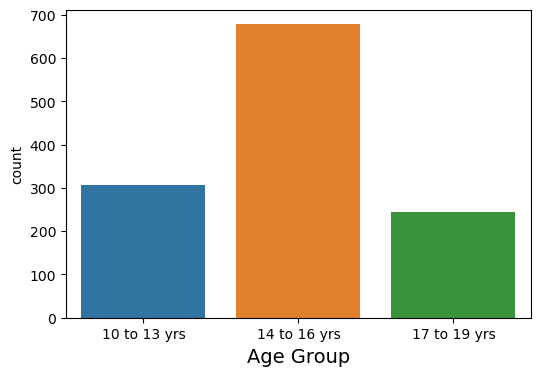

In [11]:
# now use the countplot() function from seaborn to visualise
plt.figure(figsize = (6,4))
sns.countplot(x='Age_group', data=students)
plt.xlabel('Age Group',fontsize=14)
plt.show()

From the graph above, students between 14 to 16 years were highest in our data followed by students between 10 to 13 years and least by students between 19 and 19 years old. 

###### 2. Location

In [ ]:
# first get the count of each category

students[['Location']].value_counts()

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x='Location', data=students)
plt.xlabel('Location',fontsize=14)
plt.show()

###### 3. School type

In [ ]:
# first get the count of each category

students[['School types']].value_counts()

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x='School types', data=students)
plt.xlabel('School types',fontsize=14)
plt.show()

###### 4. Sex

In [ ]:
# first get the count of each category

students[['Sex']].value_counts()

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x='Sex', data=students)
plt.xlabel('Gender',fontsize=14)
plt.show()

###### 5. Education level

In [ ]:
# first get the count of each category

students[['Education level']].value_counts()

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x='Education level', data=students)
plt.xlabel('Education level',fontsize=14)
plt.show()

###### 6. Overweight

In [ ]:
# first get the count of each category

students[['Overweight']].value_counts()

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x='Overweight', data=students)
plt.xlabel('Overweight',fontsize=14)
plt.show()

###### 7. Means to go to school

In [ ]:
# first get the count of each category

students[['Mean to go to school ']].value_counts()

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x='Mean to go to school ', data=students)
plt.xlabel('Means to go to school',fontsize=14)
plt.show()

## What did you observe from this basic visualizations?

- The column school type and Education level do not make sense.

###### Let's start with school type

In [12]:
students[['School types']].value_counts()

School types  
Day school        868
Bording school    293
Bording            68
dtype: int64

Observe that we have 3 categories, Day school, bording and bording school. This does not actually make sense since conventionlly, we have just 2 school types, Day school and Bording school. Hence, it's likely this was an error and bording and bording school should probably be one category. so let's replace bording with bording school.

In [13]:
# replace bording with bording school in our column school type
# let's use the replace() function for this task

students['School types'] = students['School types'].replace('Bording','Bording school')

Now let's verify that our operation is successful by displaying the counts and visualization

In [14]:
# display the counts for each category in the school type column

students[['School types']].value_counts()

School types  
Day school        868
Bording school    361
dtype: int64

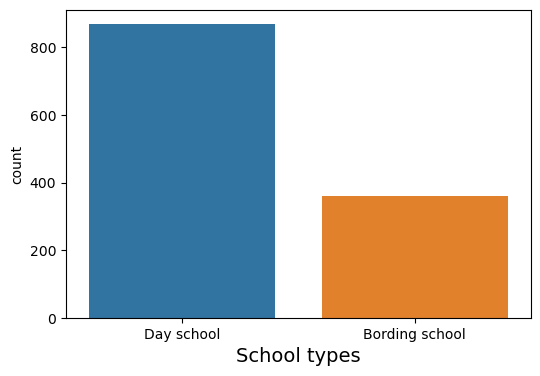

In [15]:
# plot the graph using countplot()

plt.figure(figsize=(6,4))
sns.countplot(x='School types', data=students)
plt.xlabel('School types', fontsize=14)
plt.show()

###### Next, we look at the education level column

First, let's take a look at the ages and the education level columns

In [16]:
# let's look at the first 50 rows, pay attention to the education level University

students[['Age','Education level']].head(50)

,Age,Education level
0,13,Secondary
1,14,University
2,10,University
3,19,Primary
4,12,University
5,12,Secondary
6,13,University
7,11,University
8,17,University
9,12,Secondary


What do you observe?, to make it even clearer, let's display the number of rows for the education level university against age group for a closer evaluation.

In [17]:
# display the columns Age group and Education level for University

students[['Age_group','Education level']] .loc[students['Education level']=='University'].value_counts()

Age_group     Education level
14 to 16 yrs  University         292
10 to 13 yrs  University         176
17 to 19 yrs  University         111
dtype: int64

This observation is unlikely as it does not reflect the reality. It says majority of students at university are 14-16 years followed by 10-13 year old person which is practically inaccurate. With the information we have been given about the data and site where it was collected, we can clearly state that there was an error in the data collection and entry process.

To solve this problem, we can't drop all rows with education level university as we would drop more than half of our data. At this point, we do not have enough information that can support the fact that those registered under University were supposed to be registered under Secondary, because this is likely the reality.

Hence, we might consider changing or modifying our objective of the study after the EDA process is over. For example, instead of our initial goal to determine systolic BP in secondary school students, we might instead consider determining systolic BP in children aged between 10 and 19 years. This will eliminate the bias we have for the column Education level, and in the university category

## what's next?

We have looked at the distribution of our categorical columns, let's now carry out univariant analysis on our continous variables to see how they are distributed. Later on, we would perform bivariant analysis between all our independent variables and our dependent variable (systolic BP).

## Univariate Analysis on continous variables

For our continous variables, there are several functions to use and evaluate their distribution in our dataset identify if the data is normally distributed or not, if we have any missing variables and if there are any outliers

We would use histograms to examine the distribution of our variables and a boxplot to identify any outliers

In [10]:
# display all continous variables in your dataset

students.select_dtypes(include=['int64','float64']).dtypes

Age              int64
Weight(kg)     float64
Height(cm)       int64
Systolic BP    float64
BMI            float64
dtype: object

From output above, we have 5 continous variables. for each variable, we would display a histogram and a density curve to understand the skewness of the data and we would display the boxplots as well to help us identify any outliers in our data especially on our reponse variable (Sytolic BP)

Note that we already categorised our age variable, so that we can can compare analysis between those age groups, therefore we no longer need to perform any analysis using our continous age variable.

###### 1. Weight(kg)

Summary statistics

In [11]:
# use the describe() function to display the mean, std deviation etc

students[['Weight(kg)']].describe()

,Weight(kg)
count,1229.000000
mean,54.074369
std,11.438974
min,0.000000
25%,47.000000
50%,54.000000
75%,61.000000
max,91.000000


The summary statistics shows that the average age of our participants is 54.07kg with a standard deviation of 11.43 which tells us how our weight variable is spread around the mean. The summary statistics show that the minimum weight is 0.0kg, this abnormal as no person weighs 0.0kg. likely an error in our data. The 25th, 50th, 75% percentile indicate that 25% of participants have ages less than 47.0kg, 50% of participants have ages less than 54% and 25% of our participants have ages greater than 61.0kg respectively. The maximum weight is 91.0kg

Let's further examine to see all the rows with abnormal weights

In [20]:
# use the sort_values() to display the data from lowest weight to highest

students.sort_values(by='Weight(kg)').head(10)

,Location,School types,Age,Sex,Education level,Mean to go to school,Weight(kg),Height(cm),Systolic BP,BMI,Overweight,Age_group
682,Rural,Bording school,13,Female,Secondary,On foot,0.0,161,93.0,0.000000,No,10 to 13 yrs
233,Semi urban,Day school,15,Female,Secondary,On foot,4.0,158,105.0,1.400000,YES,14 to 16 yrs
659,Semi urban,Bording school,15,Female,University,On foot,4.0,158,95.0,1.400000,No,14 to 16 yrs
703,Rural,Bording school,17,Female,University,On foot,7.0,162,123.0,2.700000,YES,17 to 19 yrs
1178,Semi urban,Day school,16,Male,Secondary,On foot,7.2,165,146.0,2.644628,YES,14 to 16 yrs
277,Semi urban,Day school,16,Female,University,By car,8.0,170,118.0,2.700000,YES,14 to 16 yrs
533,Rural,Day school,13,Female,University,On foot,8.0,165,136.0,2.900000,YES,10 to 13 yrs
1162,Semi urban,Day school,15,Male,Secondary,By car,26.0,154,95.0,10.963063,YES,14 to 16 yrs
1213,Semi urban,Day school,15,Male,Secondary,By car,26.0,154,95.0,10.963063,YES,14 to 16 yrs
1067,Rural,Bording school,12,Male,Secondary,On foot,27.7,137,99.0,14.758378,YES,10 to 13 yrs


So, from our output we can see that there are 7 rows with weights that indicate error. we will further visualise this with a boxplot to verify that these are really outliers.

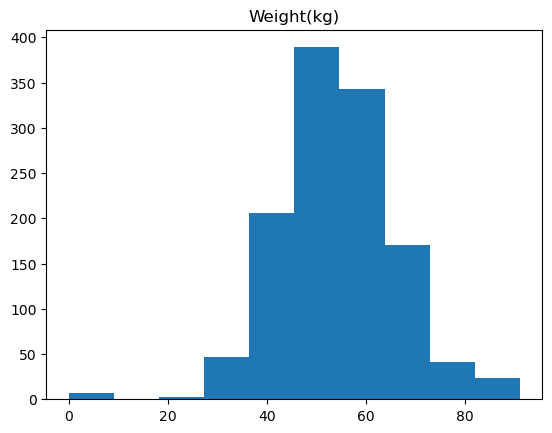

In [21]:
# display a histogram and a density plot for weight.

students.hist(column='Weight(kg)', grid=False)
plt.show()

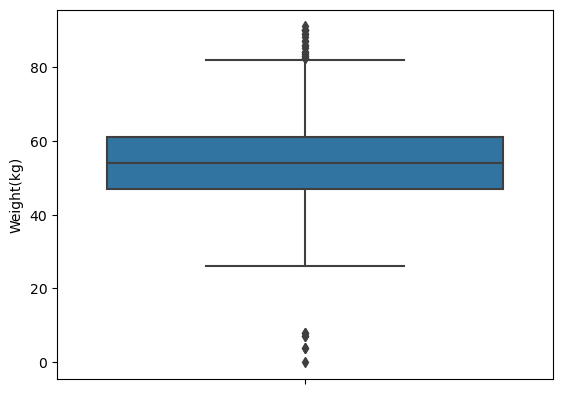

In [22]:
# display a box plot

box=sns.boxplot(y=students['Weight(kg)'])


As we can see from the boxplot, there exist extreme values for weight in our dataset that do not reflect majority of the rest of the data. This makes them outliers.

###### Height(cm)

Summary statistics

In [23]:
# use the describe() function to display the mean, std deviation etc

students[['Height(cm)']].describe()

,Height(cm)
count,1229.000000
mean,159.379170
std,20.850822
min,49.000000
25%,154.000000
50%,160.000000
75%,165.000000
max,757.000000


From the summary table, min height is 49 and max height is 757. This is very unrealistic. firsts sort our data according to decreasing height to observe the values

In [24]:
students.sort_values(by='Height(cm)', ascending = False)

,Location,School types,Age,Sex,Education level,Mean to go to school,Weight(kg),Height(cm),Systolic BP,BMI,Overweight,Age_group
142,Rural,Bording school,16,Female,Secondary,On foot,58.0,757,88.0,1.000000,No,14 to 16 yrs
976,Rural,Bording school,19,Male,University,By car,75.0,189,104.0,20.996053,No,17 to 19 yrs
997,Semi urban,Day school,16,Male,Secondary,On foot,82.5,188,124.0,23.342010,No,14 to 16 yrs
1181,Rural,Bording school,18,Male,University,On foot,74.5,187,118.0,21.304584,No,17 to 19 yrs
1003,Semi urban,Day school,17,Male,University,On foot,72.5,186,119.0,20.956180,No,17 to 19 yrs
...,...,...,...,...,...,...,...,...,...,...,...,...
314,Semi urban,Day school,15,Female,University,By car,46.0,57,111.0,141.600000,YES,14 to 16 yrs
199,Semi urban,Day school,15,Female,University,By car,46.0,57,111.0,141.600000,YES,14 to 16 yrs
1088,Rural,Day school,17,Male,Primary,By bike,45.5,55,113.0,150.413223,YES,17 to 19 yrs
77,Semi urban,Day school,14,Female,Secondary,On foot,45.0,54,113.0,154.700000,No,14 to 16 yrs


It's clear the height 757 is clearly an error in the input. let's drop this row and then re-evaluate the variable.

In [18]:
# remove row with height = 757

#students = 
students = students.drop(students[students['Height(cm)'] == 757].index, axis=0)

In [19]:
students[['Height(cm)']].describe()

,Height(cm)
count,1228.000000
mean,158.892508
std,11.991569
min,49.000000
25%,154.000000
50%,160.000000
75%,165.000000
max,189.000000


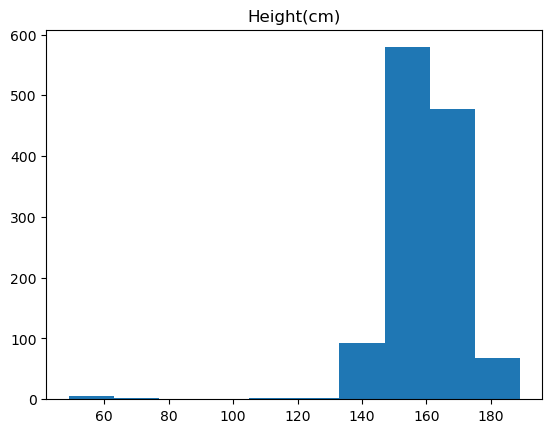

In [27]:
# display a histogram and a density plot for weight.

students.hist(column='Height(cm)', grid=False)

plt.show()

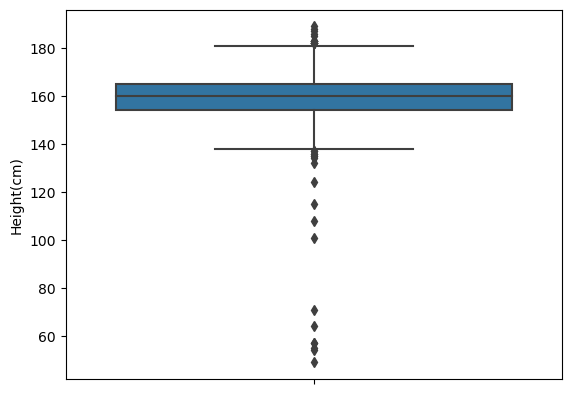

In [28]:
# display a box plot

box=sns.boxplot(y=students['Height(cm)'])


Next we look at the boby mass index

###### BMI

Summary statistics

In [22]:
# use the describe() function to get the summary statistics

students[['BMI']].describe()

,BMI
count,1228.000000
mean,21.890036
std,10.052850
min,0.000000
25%,18.900000
50%,20.900000
75%,23.046875
max,180.800000


Body mass index BMI is used to classify persons into 4 categories; underweight (<18.5), healthy weight (18.5-24.9), overweight (25-29.9) and obesity (30 and above). hence our data shows that 25% of the participants are underweight. The mean BMI is 21.9 with a standard deviation of 10.1. Data shows that the the minimum value for the BMI is 0. This is clearly an outlier.

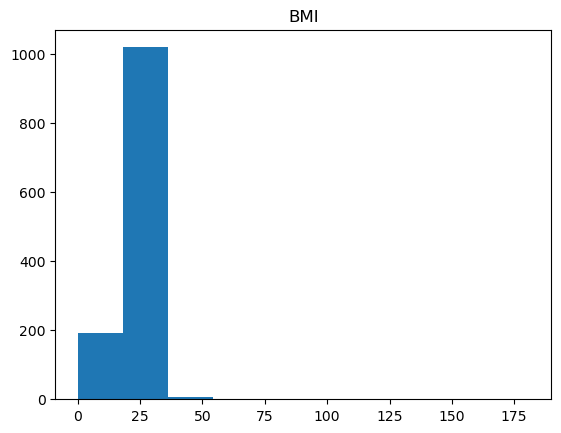

In [25]:
# display a histogram to understand the distribution of BMI

students.hist(column='BMI', grid = False)
plt.show()

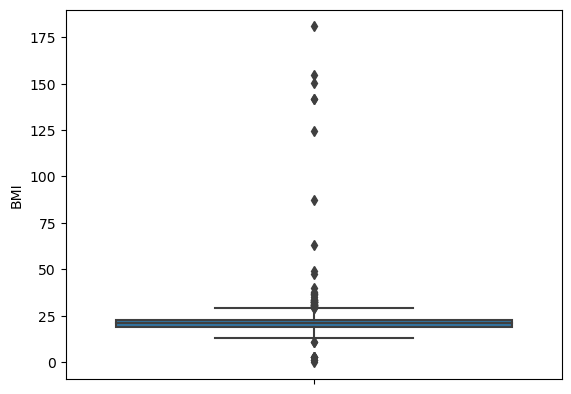

In [23]:
# display a box plot.

box = sns.boxplot( y=students['BMI'])

Now its time to look at our last continuous variable, Systolic BP (response variable)

###### Sytolic BP

In [27]:
students[['Systolic BP']].describe()

,Systolic BP
count,1228.000000
mean,113.183225
std,14.930728
min,64.000000
25%,104.000000
50%,112.000000
75%,122.000000
max,184.000000


Earlier, we already did some cleaning on our response variable like handling missing data. Next we will further clean this variable by handling outliers if any.

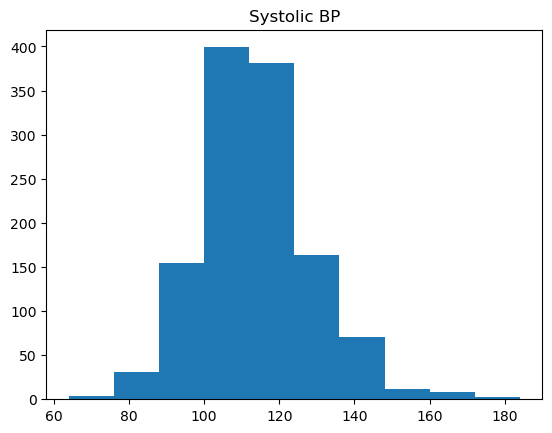

In [33]:
students.hist(column='Systolic BP', grid = False)
plt.show()

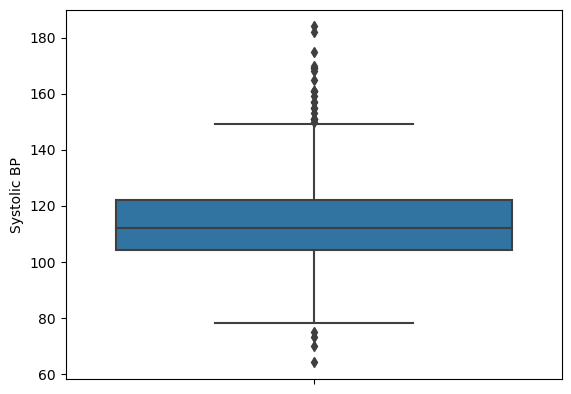

In [34]:
box = sns.boxplot(y=students['Systolic BP'])

The boxplot show that the response variable has so many values that donot reflect majority of our data points. these values are indicated by the black dots and are called outliers. 

To handle the outliers, we can drop the entire rows or replace the outliers with a value like the mean or median. But first lets calculate the number of outliers found contain by the variable Systolic BP.

To achieve this, we need to use the 25th and 75th percentile and calculate the interquartile range,iqr (percentile75 - percentile25). we need the iqr to identify our outliers because an outlier is a value lower than the 25th percentile by 1.5 * iqr and a value higher than the 75th percentile by 1.5 * iqr

In [35]:
# calculate 25th percentile of systolic BP
percentile25 = students['Systolic BP'].quantile(0.25)

# calculate 75th percentile of systolic BP
percentile75 = students['Systolic BP'].quantile(0.75)

# calculate the iqr
iqr = percentile75 - percentile25

# calculate the upper and lower thresholds beyong which any value is considered a outlier.
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# print the lower and upper limits
print(f'''Values below {lower_limit} and above {upper_limit} are outliers''')

Values below 77.0 and above 149.0 are outliers


In [38]:
# print out the rows that contain outliers
outliers = students[(students['Systolic BP'] < lower_limit) | (students['Systolic BP'] > upper_limit) ]
outliers.head(20)

,Location,School types,Age,Sex,Education level,Mean to go to school,Weight(kg),Height(cm),Systolic BP,BMI,Overweight,Age_group
141,Rural,Bording school,13,Female,University,On foot,55.0,156,175.0,22.400000,YES,10 to 13 yrs
248,Semi urban,Day school,15,Female,Primary,On foot,46.0,155,151.0,19.100000,No,14 to 16 yrs
263,Semi urban,Day school,16,Female,Secondary,By car,65.0,164,155.0,24.000000,No,14 to 16 yrs
463,Rural,Day school,13,Female,Secondary,On foot,57.0,162,155.0,21.900000,YES,10 to 13 yrs
553,Semi urban,Day school,15,Female,University,On foot,54.0,150,150.0,23.800000,YES,14 to 16 yrs
556,Semi urban,Day school,15,Female,University,By car,49.0,154,157.0,20.500000,No,14 to 16 yrs
595,Semi urban,Day school,19,Female,Secondary,On foot,90.0,163,169.0,33.700000,YES,17 to 19 yrs
600,Semi urban,Day school,16,Female,Primary,On foot,66.0,160,161.0,25.800000,YES,14 to 16 yrs
641,Semi urban,Bording school,12,Female,University,On foot,45.0,153,73.0,19.200000,No,10 to 13 yrs
674,Semi urban,Bording school,15,Female,University,On foot,58.0,151,168.0,25.400000,YES,14 to 16 yrs


In [39]:
outliers.shape[0]

25

we have 25 rows with outliers for the Systolic variable

Now, we have identified our limits beyond which our outliers lie. Next, we create a boolean mask which will be used to filter our dataset so that it only contains rows where the weight is less than the lower limit or higher than the upper limit